In [1]:
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
table_names = ['New_Card', 'District', 'Loan', 'New_Client', 'New_Disposition', 'New_Account', 'New_Transaction', 'Order']
tables = {}

In [3]:
for table_name in table_names:
    try:
        df=pd.read_excel("Main_Data.xlsx",sheet_name=table_name)
        tables[table_name]=df
    except Exception as e:
        print(f"Error importing {table_name}: {str(e)}")

In [4]:
New_Card=tables['New_Card']
District=tables['District']
Loan=tables['Loan']
New_Client=tables['New_Client']
New_Disposition=tables['New_Disposition']
New_Account=tables['New_Account']
Order=tables['Order']
New_Transaction=tables['New_Transaction']

In [5]:
df_District=pd.DataFrame(District)
df_New_Transaction=pd.DataFrame(New_Transaction)
df_New_Account=pd.DataFrame(New_Account)
df_New_Client=pd.DataFrame(New_Client)
df_New_Disposition=pd.DataFrame(New_Disposition)
df_Order=pd.DataFrame(Order)
df_Loan=pd.DataFrame(Loan)
df_New_Card=pd.DataFrame(New_Card)

# 1. Prepare a dashboard for the All the Accounts doing Credit transactions from Moravia and Prague. Prepare the Aggregated View of the transactions basis on 2 things i.e.a. Account Wise b. Month Wise c. Account and Month wise.

# 1_1 Account wise

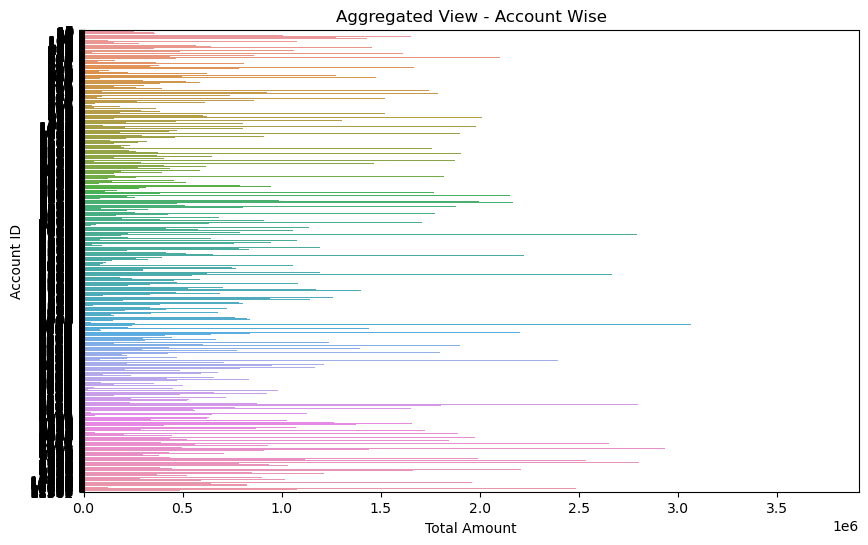

In [6]:
##Aggregated View - Account Wise
New_Transaction1=New_Transaction[New_Transaction['type']=='CREDIT']
account_wise_agg=New_Transaction1.groupby('account_id')['amount'].sum().reset_index()
account_wise_agg.head()
a1=[1,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77]
New_Account1=New_Account[New_Account['district_id'].isin(a1)]
New_Account1.head()
final_filtered_transactions=account_wise_agg.merge(New_Account1,on='account_id', how='inner')
final_filtered_transactions = final_filtered_transactions[['account_id', 'district_id', 'amount']]
final_filtered_transactions.head()
# Create visualizations
plt.figure(figsize=(10,6))
sns.barplot(x='amount',y='account_id',data=final_filtered_transactions,orient='h')
plt.title('Aggregated View - Account Wise')
plt.xlabel('Total Amount')
plt.ylabel('Account ID')
plt.show()

In [7]:
import pandas as pd
final_filtered_transactions_df = pd.DataFrame(final_filtered_transactions)
with pd.ExcelWriter('task1_1.xlsx', engine='openpyxl') as writer:
    final_filtered_transactions.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
    writer.save()

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3209863328.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 1_2 Month wise

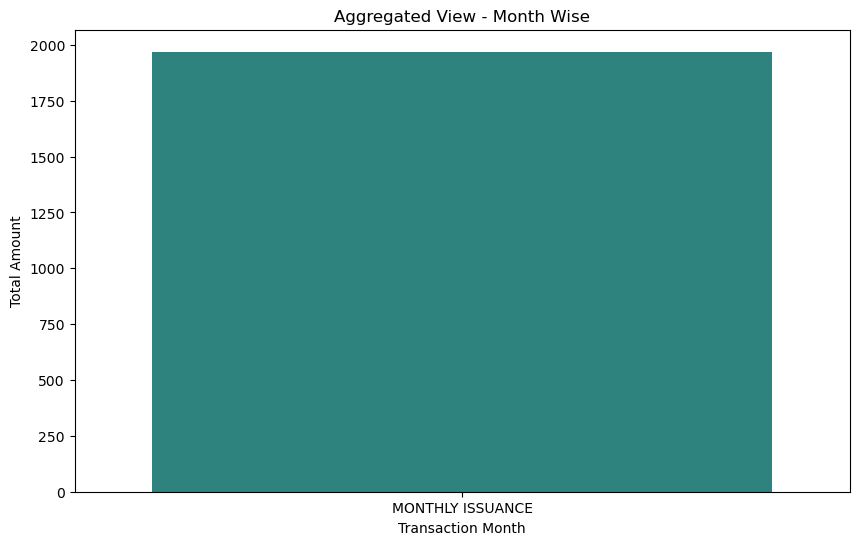

In [8]:
##Aggregated View - Month Wise
New_Transaction1_month=New_Transaction[New_Transaction['type']=='CREDIT']
account_wise_agg=New_Transaction1_month.groupby('account_id')['amount'].sum().reset_index()
account_wise_agg.head()
a1=[1,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77]
New_Account1_month=New_Account[New_Account['district_id'].isin(a1)]
New_Account1_month.head()
final_filtered_transactions=account_wise_agg.merge(New_Account1_month,on='account_id', how='inner')
final_filtered_transactions = final_filtered_transactions[['district_id', 'amount','frequency']]
final_filtered_transactions = final_filtered_transactions[final_filtered_transactions['frequency'] == 'MONTHLY ISSUANCE']
final_filtered_transactions.head()
# Create visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data=final_filtered_transactions, x='frequency',palette='viridis')
plt.title('Aggregated View - Month Wise')
plt.xlabel('Transaction Month')
plt.ylabel('Total Amount')
plt.show()

In [9]:
final_filtered_transactions_df = pd.DataFrame(final_filtered_transactions)
with pd.ExcelWriter('task1_2.xlsx', engine='openpyxl') as writer:
    final_filtered_transactions.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
    writer.save()

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1504399166.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 1_3 Account and Month wise

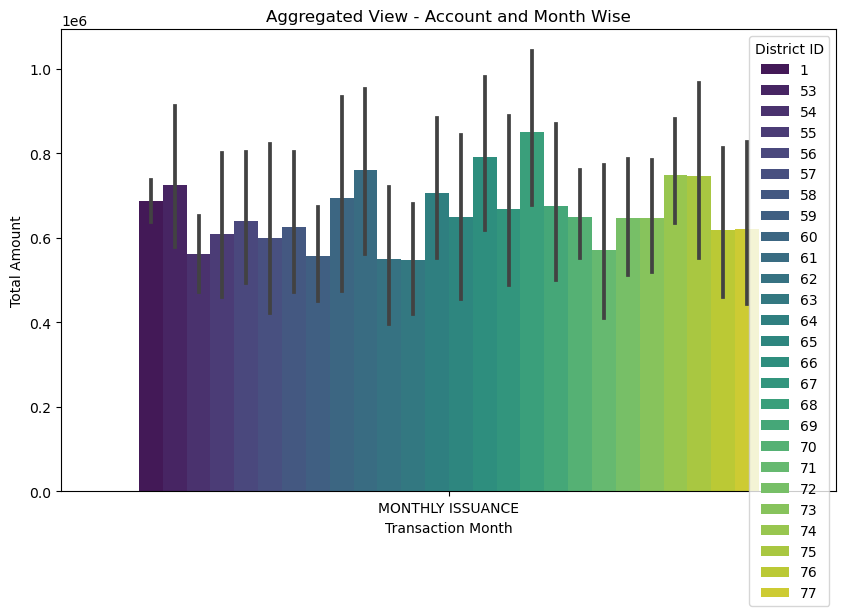

In [10]:
##Aggregated View - Month Wise
New_Transaction1_month=New_Transaction[New_Transaction['type']=='CREDIT']
account_wise_agg=New_Transaction1_month.groupby('account_id')['amount'].sum().reset_index()
account_wise_agg.head()
a1=[1,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77]
New_Account1_month=New_Account[New_Account['district_id'].isin(a1)]
New_Account1_month.head()
final_filtered_transactions=account_wise_agg.merge(New_Account1_month,on='account_id', how='inner')
final_filtered_transactions = final_filtered_transactions[['account_id', 'district_id', 'amount','frequency']]
final_filtered_transactions = final_filtered_transactions[final_filtered_transactions['frequency'] == 'MONTHLY ISSUANCE']
final_filtered_transactions.head()
# Create visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data=final_filtered_transactions, x='frequency', y='amount', hue='district_id', palette='viridis')
plt.title('Aggregated View - Account and Month Wise')
plt.xlabel('Transaction Month')
plt.ylabel('Total Amount')
plt.legend(title='District ID')
plt.show()

In [11]:
# Create a DataFrame with only the relevant data from 'final_filtered_transactions_df'
relevant_data = final_filtered_transactions_df.head(1975)
writer = pd.ExcelWriter('task1_3.xlsx', engine='openpyxl')
relevant_data.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task1_3.xlsx")

Data saved to task1_3.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3921596562.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 2. Analysis on Highly populated versus Low populated districts. Find out the amount of Credit and Debit transaction from 5 highly populated and 5 lowest populated areas respectively, above analysis should be from last 3 months.


In [12]:
#spliting date from transaction table
New_Transaction['date'] = pd.to_datetime(New_Transaction['date'], format='%y%m%d')
ref_date=datetime.strptime('981219','%y%m%d')
three_months_ago = ref_date - timedelta(days=90)
transactions_last_3_months = New_Transaction[New_Transaction['date'] >= three_months_ago]
merged_transactions = transactions_last_3_months.merge(New_Account, on='account_id', how='left')
transactions_last_3_months.tail()
df_district = pd.DataFrame(District)
# Filter transactions from highly and low populated districts in the last 3 months
highly_populated_districts = District.sort_values(by='A4', ascending=False).head(5)
low_populated_districts = District.sort_values(by='A4').head(5)
# Get the district IDs of highly and low populated districts
highly_populated_ids = highly_populated_districts['A1'].tolist()
low_populated_ids = low_populated_districts['A1'].tolist()
# Filter transactions from highly and low populated districts in the last 3 months
highly_populated_transactions = merged_transactions[merged_transactions['district_id'].isin(highly_populated_ids)]
low_populated_transactions = merged_transactions[merged_transactions['district_id'].isin(low_populated_ids)]
# Calculate the total amount of credit and debit transactions for highly populated districts
total_credit_highly_populated = highly_populated_transactions[highly_populated_transactions['type'] == 'CREDIT']['amount'].sum()
total_debit_highly_populated = highly_populated_transactions[highly_populated_transactions['type'] == 'DEBIT']['amount'].sum()

# Calculate the total amount of credit and debit transactions for low populated districts
total_credit_low_populated = low_populated_transactions[low_populated_transactions['type'] == 'CREDIT']['amount'].sum()
total_debit_low_populated = low_populated_transactions[low_populated_transactions['type'] == 'DEBIT']['amount'].sum()

In [13]:
print("Total Credit Amount (Highly Populated):", total_credit_highly_populated)
print("Total Debit Amount (Highly Populated):", total_debit_highly_populated)

print("Total Credit Amount (Low Populated):", total_credit_low_populated)
print("Total Debit Amount (Low Populated):", total_debit_low_populated)
#storing in excel file
results_data = {
    'District Type': ['Highly Populated', 'Low Populated'],
    'Total Credit Amount': [total_credit_highly_populated, total_credit_low_populated],
    'Total Debit Amount': [total_debit_highly_populated, total_debit_low_populated]
}
results_df = pd.DataFrame(results_data)

Total Credit Amount (Highly Populated): 58737742.900000006
Total Debit Amount (Highly Populated): 53807327.0
Total Credit Amount (Low Populated): 13801016.8
Total Debit Amount (Low Populated): 12926596.8


In [14]:
# Create a DataFrame with only the relevant data from 'final_filtered_transactions_df'
relevant_data = results_df.head(108)  
writer = pd.ExcelWriter('task2.xlsx', engine='openpyxl')
relevant_data.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task2.xlsx")

Data saved to task2.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\580457334.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [15]:
final_filtered_transactions_df = pd.DataFrame(final_filtered_transactions)
with pd.ExcelWriter('task2.xlsx', engine='openpyxl') as writer:
    final_filtered_transactions.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
    writer.save()

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\2859035958.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 3.How many cards are issued to mid age females?

In [16]:
client_card_info = New_Client.merge(New_Disposition, on='client_id').merge(New_Card, on='disp_id')
# Extract the birth year, month, and day from the birth_number column
client_card_info['birth_year']=(client_card_info['birth_number'] // 10000).astype(str).str.zfill(2)
client_card_info['birth_month'] = ((client_card_info['birth_number'] // 100) % 100).astype(str).str.zfill(2)
client_card_info['birth_day'] = (client_card_info['birth_number'] % 100).astype(str).str.zfill(2)
# Calculate the birth date in the format 'YYMMDD' for men and 'YYMM+50DD' for women
client_card_info['birth_date'] = client_card_info.apply(
    lambda row: row['birth_year'] + row['birth_month'] + row['birth_day'] if row['gender'] == 'MALE' else row['birth_year'] + row['birth_month'] + str(int(row['birth_day']) - 50),
    axis=1
)

In [17]:
# Define age groups
age_groups = {
    'ADULT': (18, 30),  # Adjust the age range as needed
    'MIDDLE AGED': (31, 50),  # Adjust the age range as needed
    'SENIOR': (51, 100),  # Adjust the age range as needed
}
# Function to calculate age from birth date
def calculate_age(birth_date):
    current_year = pd.Timestamp.now().year
    birth_year = 1900 + int(birth_date[:2])
    return current_year - birth_year
def categorize_age(age):
    if 18 <= age <= 30:
        return 'ADULT'
    elif 31 <= age <= 50:
        return 'MIDDLE AGED'
    elif 51 <= age <= 100:
        return 'SENIOR'
    else:
        return 'UNKNOWN'
client_card_info['age'] = client_card_info['birth_date'].apply(calculate_age)
client_card_info['age_group'] = client_card_info['age'].apply(categorize_age)
middle_aged_females = client_card_info[
    (client_card_info['age_group'] == 'MIDDLE AGED') &
    (client_card_info['gender'] == 'FEMALE')
]
# Count the unique card IDs associated with middle-aged females
num_cards_issued = middle_aged_females['card_id'].nunique()
print(f"Number of cards issued to middle-aged females: {num_cards_issued}")
# Create a DataFrame with only the relevant data from 'final_filtered_transactions_df'
relevant_data = final_filtered_transactions_df.head(108)  # Change this to the number you want to store

Number of cards issued to middle-aged females: 108


In [18]:
writer = pd.ExcelWriter('task3.xlsx', engine='openpyxl')
relevant_data.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task3.xlsx")

Data saved to task3.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\2860404558.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 4. Number of cards issued in district where average salary is more tha?n 9000, is it a good strategy?

In [19]:
average_salary_threshold=9000
selected_districts = District[District['A11'] >average_salary_threshold]
# Merge the tables to find cards issued in selected districts
client_cards=(New_Client.merge(New_Disposition,on='client_id')
                        .merge(New_Card,left_on='account_id',right_on='disp_id')
                        .merge(selected_districts[['A1','A11']],left_on='district_id',right_on='A1')
)
# Count the number of unique cards issued in these districts
number_of_cards_issued = client_cards['card_id'].nunique()

print(f'Number of cards issued in districts with average salary > {average_salary_threshold}: {number_of_cards_issued}')
# Create a DataFrame with only the relevant data from 'final_filtered_transactions_df'
relevant_data = final_filtered_transactions_df.head(275)  # Change this to the number you want to store


Number of cards issued in districts with average salary > 9000: 275


In [20]:
writer = pd.ExcelWriter('task4.xlsx', engine='openpyxl')
relevant_data.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task4.xlsx")

Data saved to task4.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\4191688610.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# It is not good to apply this strategy because entropy of this is very less 

# 5. Are we providing loans to members belonging to district where committed crimes are more than 6000 for code 95, if yes then provide the number of loans per district?

In [21]:
# Define the crime threshold
crime_threshold = 6000
District['A15'] = pd.to_numeric(District['A15'], errors='coerce')  # Use 'coerce' to handle non-numeric values

# Filter districts with committed crimes greater than the threshold for code '95'
high_crime_districts = District[District['A15'] > crime_threshold]
high_crime_districts
loans_in_high_crime_districts = New_Account.merge(Loan, on='account_id')
loans_in_high_crime_districts = loans_in_high_crime_districts.merge(high_crime_districts[['A1', 'A15']], left_on='district_id', right_on='A1')
loan_counts_per_district = loans_in_high_crime_districts['A1'].value_counts()
print("Number of loans per district in high crime districts (code '95'):")
print(loan_counts_per_district)

Number of loans per district in high crime districts (code '95'):
1     84
54    24
70    24
74    20
72    14
47    10
14     8
40     6
26     6
41     3
Name: A1, dtype: int64


In [22]:
writer = pd.ExcelWriter('task5.xlsx', engine='openpyxl')
loan_counts_per_district.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task5.xlsx")

Data saved to task5.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1233968107.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 6.How much money was collected from other banks for customer belongs to districts where unemployment rate for any year is greater than 2%

In [23]:
unemployment_threshold = 2
df_District['A12'] = pd.to_numeric(df_District['A12'], errors='coerce')
df_District['A13'] = pd.to_numeric(df_District['A13'], errors='coerce')
high_unemployment_districts = df_District[
    (df_District['A12'] > unemployment_threshold) | 
    (df_District['A13'] > unemployment_threshold)
]

In [24]:
client_account_merged = df_New_Client.merge(df_New_Disposition[['client_id', 'account_id']], on='client_id')
account_client_merged = client_account_merged.merge(df_New_Account[['account_id', 'district_id']], on='account_id')
transactions_from_other_banks = account_client_merged.merge(
    df_New_Transaction[df_New_Transaction['operation'] == 'PREVOD Z UCTU'],  # Filter transactions from other banks
    on='account_id',
)
account_order_merged = account_client_merged.merge(df_Order[['account_id', 'bank_to', 'amount']], on='account_id')
account_order_merged
money_collected_from_other_banks = account_order_merged[
    account_order_merged['bank_to'] != account_order_merged['district_id_x']
]
total_money_collected = money_collected_from_other_banks['amount'].sum()
print("Total money collected from other banks for clients in high unemployment districts:", total_money_collected)

Total money collected from other banks for clients in high unemployment districts: 25795876.8


In [25]:
writer = pd.ExcelWriter('task6.xlsx', engine='openpyxl')
money_collected_from_other_banks.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task6.xlsx")

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\951806207.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


Data saved to task6.xlsx


# 7. Create profile of customers in accordance of districts where max money is being paid to a. Insurance. b. Household c. Leasing d. Loan

In [28]:
payment_types = ['POJISTNE', 'SIPO', 'LEASING', 'UVER']
customer_profiles = pd.DataFrame(columns=['district_id', 'payment_type', 'total_payment'])

In [30]:
for payment_type in payment_types:
    # Filter transactions of the current payment type
    filtered_transactions = df_Order[df_Order['k_symbol'] == payment_type]
    
    # Group transactions by district and calculate the total payment for each district
    district_payment = filtered_transactions.groupby('account_id')['amount'].sum().reset_index()
    
    # Find the district with the maximum payment for the current payment type
    max_payment_district = district_payment.loc[district_payment['amount'].idxmax()]
    
    # Append the result to the customer_profiles DataFrame
    customer_profiles = customer_profiles.append({'district_id': max_payment_district['account_id'],
                                                  'payment_type': payment_type,
                                                  'total_payment': max_payment_district['amount']},
                                                 ignore_index=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3573363001.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': max_payment_district['account_id'],
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3573363001.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': max_payment_district['account_id'],
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3573363001.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': max_payment_district['account_id'],
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3573363001.py:12: FutureWarning: The frame.append method is de

In [31]:
customer_profiles

,district_id,payment_type,total_payment
0,9883.0,POJISTNE,12504.0
1,1407.0,SIPO,14882.0
2,266.0,LEASING,4975.2
3,6950.0,UVER,9910.0
4,9883.0,POJISTNE,12504.0
5,1407.0,SIPO,14882.0
6,266.0,LEASING,4975.2
7,6950.0,UVER,9910.0


In [32]:
writer = pd.ExcelWriter('task7.xlsx', engine='openpyxl')
customer_profiles.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task7.xlsx")

Data saved to task7.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\998876694.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 8. Create profile of customers in accordance of districts for the status of loan payment, there will be 4 categories

In [33]:
payment_types = ['POJISTNE', 'SIPO', 'LEASING', 'UVER']

# Initialize an empty DataFrame to store the results
customer_profiles = pd.DataFrame(columns=['district_id', 'loan_status_A', 'loan_status_B', 'loan_status_C', 'loan_status_D'])

# Iterate over each district
for district_id in df_District['A1']:
    # Filter loans for the current district
    district_loans = df_Loan[df_Loan['account_id'].isin(df_New_Account[df_New_Account['district_id'] == district_id]['account_id'])]

    # Calculate loan statuses for the current district
    loan_statuses = district_loans['status'].value_counts().to_dict()
    
    # Initialize a dictionary to store loan statuses for all categories
    loan_status_dict = {
        'loan_status_A': loan_statuses.get('A', 0),
        'loan_status_B': loan_statuses.get('B', 0),
        'loan_status_C': loan_statuses.get('C', 0),
        'loan_status_D': loan_statuses.get('D', 0)
    }
    
    # Append the result to the customer_profiles DataFrame
    customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)

# Merge with district information to get district names
customer_profiles = customer_profiles.merge(df_District[['A1', 'A2']], left_on='district_id', right_on='A1')

# Rename columns for clarity
customer_profiles.rename(columns={'A1': 'district_code', 'A2': 'district_name'}, inplace=True)

# Print the resulting customer profiles
print(customer_profiles)

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.

   district_id loan_status_A loan_status_B loan_status_C loan_status_D  \
0            1            34             3            43             4   
1            2             1             0             5             0   
2            3             1             0             3             2   
3            4             2             0             4             1   
4            5             2             0             8             0   
..         ...           ...           ...           ...           ...   
72          73             1             1             4             2   
73          74             6             2            11             1   
74          75             3             0             1             0   
75          76             0             0             5             0   
76          77             1             0             5             0   

    district_code    district_name  
0               1      Hl.m. Praha  
1               2          Benesov  


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1117866952.

In [34]:
customer_profiles

,district_id,loan_status_A,loan_status_B,loan_status_C,loan_status_D,district_code,district_name
0,1,34,3,43,4,1,Hl.m. Praha
1,2,1,0,5,0,2,Benesov
2,3,1,0,3,2,3,Beroun
3,4,2,0,4,1,4,Kladno
4,5,2,0,8,0,5,Kolin
...,...,...,...,...,...,...,...
72,73,1,1,4,2,73,Opava
73,74,6,2,11,1,74,Ostrava - mesto
74,75,3,0,1,0,75,Prerov
75,76,0,0,5,0,76,Sumperk


In [35]:
writer = pd.ExcelWriter('task8.xlsx', engine='openpyxl')
customer_profiles.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task8.xlsx")

Data saved to task8.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3816478988.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 9. Relate the output of above with district conditions like Crime, Unemployment Rate and Average Salary

In [36]:
# Define a list of payment types
payment_types = ['POJISTNE', 'SIPO', 'LEASING', 'UVER']

# Initialize an empty DataFrame to store the results
customer_profiles = pd.DataFrame(columns=['district_id', 'loan_status_A', 'loan_status_B', 'loan_status_C', 'loan_status_D'])

# Iterate over each district
for district_id in df_District['A1']:
    # Filter loans for the current district
    district_loans = df_Loan[df_Loan['account_id'].isin(df_New_Account[df_New_Account['district_id'] == district_id]['account_id'])]

    # Calculate loan statuses for the current district
    loan_statuses = district_loans['status'].value_counts().to_dict()
    
    # Initialize a dictionary to store loan statuses for all categories
    loan_status_dict = {
        'loan_status_A': loan_statuses.get('A', 0),
        'loan_status_B': loan_statuses.get('B', 0),
        'loan_status_C': loan_statuses.get('C', 0),
        'loan_status_D': loan_statuses.get('D', 0)
    }
    
    # Append the result to the customer_profiles DataFrame
    customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)

# Merge with district information to get district names and conditions
customer_profiles = customer_profiles.merge(df_District[['A1', 'A2', 'A11', 'A12', 'A13', 'A15', 'A16']], left_on='district_id', right_on='A1')

# Rename columns for clarity
customer_profiles.rename(columns={'A1': 'district_code', 'A2': 'district_name', 'A11': 'average_salary', 'A12': 'unemployment_rate_95', 'A13': 'unemployment_rate_96', 'A15': 'committed_crimes_95', 'A16': 'committed_crimes_96'}, inplace=True)

# Analyze the relationship between loan status and district conditions
loan_status_district_relationship = customer_profiles.groupby(['district_name']).agg({
    'loan_status_A': 'mean',
    'loan_status_B': 'mean',
    'loan_status_C': 'mean',
    'loan_status_D': 'mean',
    'average_salary': 'mean',
    'unemployment_rate_95': 'mean',
    'unemployment_rate_96': 'mean',
    'committed_crimes_95': 'mean',
    'committed_crimes_96': 'mean'
}).reset_index()

# Print the resulting DataFrame
print(loan_status_district_relationship)


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3840500751.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3840500751.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3840500751.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3840500751.

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3840500751.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3840500751.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3840500751.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_profiles = customer_profiles.append({'district_id': district_id, **loan_status_dict}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\3840500751.

       district_name  loan_status_A  loan_status_B  loan_status_C  \
0            Benesov            1.0            0.0            5.0   
1             Beroun            1.0            0.0            3.0   
2            Blansko            3.0            0.0            3.0   
3            Breclav            1.0            1.0            5.0   
4       Brno - mesto            4.0            2.0           15.0   
..               ...            ...            ...            ...   
72            Vsetin            1.0            0.0            5.0   
73            Vyskov            3.0            0.0            4.0   
74  Zdar nad Sazavou            4.0            0.0            3.0   
75              Zlin            6.0            0.0           10.0   
76            Znojmo            1.0            1.0            4.0   

    loan_status_D  average_salary  unemployment_rate_95  unemployment_rate_96  \
0             0.0          8507.0                  1.67                  1.85   
1        

In [37]:
print(loan_status_district_relationship)

       district_name  loan_status_A  loan_status_B  loan_status_C  \
0            Benesov            1.0            0.0            5.0   
1             Beroun            1.0            0.0            3.0   
2            Blansko            3.0            0.0            3.0   
3            Breclav            1.0            1.0            5.0   
4       Brno - mesto            4.0            2.0           15.0   
..               ...            ...            ...            ...   
72            Vsetin            1.0            0.0            5.0   
73            Vyskov            3.0            0.0            4.0   
74  Zdar nad Sazavou            4.0            0.0            3.0   
75              Zlin            6.0            0.0           10.0   
76            Znojmo            1.0            1.0            4.0   

    loan_status_D  average_salary  unemployment_rate_95  unemployment_rate_96  \
0             0.0          8507.0                  1.67                  1.85   
1        

In [38]:
writer = pd.ExcelWriter('task9.xlsx', engine='openpyxl')
loan_status_district_relationship.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task9.xlsx")

Data saved to task9.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\675078696.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 10. Owners from which district are issuing permanent orders and asking for a loan.

In [39]:
# Filter for owners (type 'OWNER')
owner_dispositions = df_New_Disposition[df_New_Disposition['type'] == 'OWNER']

# Merge the owner dispositions with accounts
owner_accounts = owner_dispositions.merge(df_New_Account, on='account_id', how='inner')

# Find clients who are owners and have issued permanent orders or applied for a loan
owners_with_orders_or_loans = owner_accounts[
    (owner_accounts['account_id'].isin(df_Order['account_id'])) |
    (owner_accounts['account_id'].isin(df_Loan['account_id']))
]

# Get the unique districts from which these owners are issuing orders or applying for loans
unique_districts = owners_with_orders_or_loans['district_id'].unique()
district_info = []
# Display the list of unique districts
for district_id in unique_districts:
    district_name = df_District[df_District['A1'] == district_id]['A2'].values[0]
    district_info.append({'District ID': district_id, 'District Name': district_name})

result_df = pd.DataFrame(district_info)
result_df

,District ID,District Name
0,18,Pisek
1,1,Hl.m. Praha
2,5,Kolin
3,12,Pribram
4,15,Cesky Krumlov
...,...,...
72,42,Havlickuv Brod
73,62,Uherske Hradiste
74,9,Nymburk
75,10,Praha - vychod


In [40]:
writer = pd.ExcelWriter('task10.xlsx', engine='openpyxl')
result_df.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task10.xlsx")

Data saved to task10.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\2639771071.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 10.Can we say customers from Bohemia are the ones having more male customers possessing Gold cards in comparison of Moravia?

In [41]:
# Filter for customers with Gold cards
gold_card_customers = df_New_Card[df_New_Card['type'] == 'GOLD']

# Merge Card information with Client information
card_client_info = gold_card_customers.merge(df_New_Disposition, on='disp_id', how='inner')
card_client_info = card_client_info.merge(df_New_Client, on='client_id', how='inner')
card_client_info.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y,Unnamed: 0,birth_number,district_id,gender,age,age_levels
0,208,1246,GOLD,950208,1246,1039,OWNER,1186,621119,70,MALE,37,MIDDLE AGED
1,3,41,GOLD,950903,41,33,OWNER,39,680827,22,MALE,31,ADULT
2,261,1629,GOLD,951109,1629,1345,OWNER,1539,660901,28,MALE,33,ADULT
3,296,1876,GOLD,951113,1876,1547,OWNER,1769,510701,1,MALE,48,MIDDLE AGED
4,427,2688,GOLD,960125,2688,2219,OWNER,2547,671024,60,FEMALE,32,ADULT


In [42]:
# Define Bohemia and Moravia districts based on 'a2' values
bohemia_districts =[]
moravia_districts=[]
for data in range(2,53):
    bohemia_districts.append(data)
for data in range(53,78):
    moravia_districts.append(data)
# Calculate the number of male customers with Gold cards in Bohemia
bohemia_gold_male_customers = card_client_info[
    (card_client_info['district_id'].isin(bohemia_districts)) &
    (card_client_info['gender'] == 'MALE')
]

# Calculate the number of male customers with Gold cards in Moravia
moravia_gold_male_customers = card_client_info[
    (card_client_info['district_id'].isin(moravia_districts)) &
    (card_client_info['gender'] == 'MALE')
]

# Compare the counts
if len(bohemia_gold_male_customers) > len(moravia_gold_male_customers):
    print("Customers from Bohemia have more male customers possessing Gold cards.")
elif len(bohemia_gold_male_customers) < len(moravia_gold_male_customers):
    print("Customers from Moravia have more male customers possessing Gold cards.")
else:
    print("Both Bohemia and Moravia have the same number of male customers possessing Gold cards.")


Customers from Bohemia have more male customers possessing Gold cards.


In [43]:
writer = pd.ExcelWriter('task11.xlsx', engine='openpyxl')
moravia_gold_male_customers.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task11.xlsx")

Data saved to task11.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1239702038.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 12. How many customers having credit card are also availing the loan facilities.


In [44]:
# Filter for customers with credit cards (GOLD, CLASSIC, or JUNIOR)
credit_card_customers = df_New_Card[df_New_Card['type'].isin(['GOLD', 'CLASSIC', 'JUNIOR'])]

# Merge credit card information with disposition information to get account IDs
card_disposition_info = credit_card_customers.merge(df_New_Disposition, on='disp_id', how='inner')

# Merge account IDs with loan information to identify customers with credit cards who have loans
customers_with_loans = card_disposition_info['account_id'].isin(df_Loan['account_id'])

# Count the number of unique customers with credit cards who have loans
num_customers_with_loans = len(customers_with_loans[customers_with_loans == True])
result_df = card_disposition_info[customers_with_loans]

print(f"The number of customers with credit cards who also have loans is: {num_customers_with_loans}")


The number of customers with credit cards who also have loans is: 170


In [45]:
writer = pd.ExcelWriter('task12.xlsx', engine='openpyxl')
result_df.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task12.xlsx")

Data saved to task12.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\521953327.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 13. Can we say that customers having Classic and Junior card are the ones who are more in debt.

In [46]:
# Filter for customers with Classic and Junior cards
classic_junior_customers = df_New_Card[df_New_Card['type'].isin(['CLASSIC', 'JUNIOR'])]

# Merge card information with disposition information to get account IDs
card_disposition_info = classic_junior_customers.merge(df_New_Disposition, on='disp_id', how='inner')

# Merge account IDs with loan information to identify customers with loans
customers_with_loans = card_disposition_info['account_id'].isin(df_Loan['account_id'])

# Filter loans for customers with Classic and Junior cards
classic_junior_loans = df_Loan[df_Loan['account_id'].isin(card_disposition_info[customers_with_loans]['account_id'])]

# Count how many customers with Classic and Junior cards are in debt
num_customers_in_debt = len(classic_junior_loans[classic_junior_loans['status'] == 'D'])

# Calculate the total number of customers with Classic and Junior cards
total_customers = len(classic_junior_customers)

# Calculate the percentage of customers in debt
percentage_in_debt = (num_customers_in_debt / total_customers) * 100

print(f"Total customers with Classic and Junior cards: {total_customers}")
print(f"Customers with Classic and Junior cards in debt: {num_customers_in_debt}")
print(f"Percentage of customers with Classic and Junior cards in debt: {percentage_in_debt:.2f}%")
results_df = pd.DataFrame({
    'Total customers with Classic and Junior cards': [total_customers],
    'Customers with Classic and Junior cards in debt': [num_customers_in_debt],
    'Percentage of customers with Classic and Junior cards in debt': [percentage_in_debt]
})

Total customers with Classic and Junior cards: 804
Customers with Classic and Junior cards in debt: 2
Percentage of customers with Classic and Junior cards in debt: 0.25%


In [47]:
writer = pd.ExcelWriter('task13.xlsx', engine='openpyxl')
results_df.to_excel(writer, sheet_name='final_filtered_transactions', index=False)
writer.save()
print("Data saved to task13.xlsx")

Data saved to task13.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\645505263.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# Extra:- Merging all excel file in one sheet 

In [48]:
file1_1 = 'task1_1.xlsx'
df1_1 = pd.read_excel(file1_1,sheet_name='final_filtered_transactions')
file1_2 = 'task1_2.xlsx'
df1_2 = pd.read_excel(file1_2,sheet_name='final_filtered_transactions')
file1_3 = 'task1_3.xlsx'
df1_3 = pd.read_excel(file1_3,sheet_name='final_filtered_transactions')
file2 = 'task2.xlsx'
df2 = pd.read_excel(file2,sheet_name='final_filtered_transactions')
file3 = 'task3.xlsx'
df3 = pd.read_excel(file3,sheet_name='final_filtered_transactions')
file4 = 'task4.xlsx'
df4 = pd.read_excel(file4,sheet_name='final_filtered_transactions')
file5 = 'task5.xlsx'
df5 = pd.read_excel(file5,sheet_name='final_filtered_transactions')
file6 = 'task6.xlsx'
df6 = pd.read_excel(file6,sheet_name='final_filtered_transactions')
file7 = 'task7.xlsx'
df7 = pd.read_excel(file7,sheet_name='final_filtered_transactions') 
file8 = 'task8.xlsx'
df8 = pd.read_excel(file8,sheet_name='final_filtered_transactions') 
file9 = 'task9.xlsx'
df9 = pd.read_excel(file9,sheet_name='final_filtered_transactions') 
file10 = 'task10.xlsx'
df10 = pd.read_excel(file10,sheet_name='final_filtered_transactions') 
file11 = 'task11.xlsx'
df11 = pd.read_excel(file11,sheet_name='final_filtered_transactions')  
file12 = 'task12.xlsx'
df12 = pd.read_excel(file12,sheet_name='final_filtered_transactions') 
file13 = 'task13.xlsx'
df13 = pd.read_excel(file13,sheet_name='final_filtered_transactions')  

In [49]:
with pd.ExcelWriter('Final_solution.xlsx', engine='openpyxl') as writer:
    df1_1.to_excel(writer, sheet_name='task1_1', index=False)
    df1_2.to_excel(writer, sheet_name='task1_2', index=False)
    df1_3.to_excel(writer, sheet_name='task1_3', index=False)
    df2.to_excel(writer, sheet_name='task2', index=False)
    df3.to_excel(writer, sheet_name='task3', index=False)
    df4.to_excel(writer, sheet_name='task4', index=False)
    df5.to_excel(writer, sheet_name='task5', index=False)
    df6.to_excel(writer, sheet_name='task6', index=False)
    df7.to_excel(writer, sheet_name='task7', index=False)
    df8.to_excel(writer, sheet_name='task8', index=False)
    df9.to_excel(writer, sheet_name='task9', index=False)
    df10.to_excel(writer, sheet_name='task10', index=False)
    df11.to_excel(writer, sheet_name='task11', index=False)
    df12.to_excel(writer, sheet_name='task12', index=False)
    df13.to_excel(writer, sheet_name='task13', index=False)
    
    writer.save()

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\2081992733.py:18: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
